In [23]:
!pip install hfst-dev
import hfst_dev
from hfst_dev import compile_lexc_script, compile_lexc_file
from hfst_dev import fst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# DEFINING DICTIONRIES MANUALLY
nominals_dict = {"chile": "child", "mid" : "average", "hunty": "honey", "sicc" : "sick", "deadass" : "completely serious", "smol" : "small",  "thicc" : "thick", "sus" : "suspicious", "shook" : "shaken", "simp": "obsessive fool", "bestie": "best friend", "cringe" : "embarrassing", "dweeb" : "socially inept person", "simp" : "henpecked", "periodt" : "period", "cheugy" : "outmoded", "low-key" : "secretly", "high-key" : "epically", "steez" : "effort", "whip" : "car", "dank" : "excellent", "boujee" : "high class", "lewk" : "look", "salty" : "jealous", "snack" : "very attractive", "stan" : "fan", "fam" : "family", "cancel culture" : "condemning culture", "sis": "sister"}
verbs_dict = {"talk shit": "speak negatively", "understood the assignment" : "did it perfectly", "slay" : "do really well", "chill" : "relax", "slaps": "is good quality", "go off": "do the most", "get that bread" : "get that money", "spill the tea" : "tell the gossip", "yeet" : "throw away", "take several seats" : "shut up", "ghost" : "ignore", "finna" : "will", "sip tea" : "eavesdrop"}
pronouns_dict = {"ya boi" : "I", "u" : "you", "them" : "these"}
phrases_dict = {"sike": "just joking", "y u" : "why do you", "no cap" : "no lie", "finna" : "about to"}
abbreviations_dict = {"f": "rip", "tho" : "though", "y" : "why", "tbh" : "to be honest", "yolo": "you only live once", "the GOAT" : "the greatest of all time", "tfw" : "that feeling when", "idgaf" : "I don't give a f*ck", "dm" : "direct message", "mf": "motherf*cker", "hmu": "hit me up", "fml": "f*ck my life", "lol":"haha", "w": "win", "l":"loss", "nunya": "none of your business"}
stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
lexicon = {}
lexicon.update(nominals_dict)
lexicon.update(phrases_dict)
lexicon.update(verbs_dict)
lexicon.update(pronouns_dict)
lexicon.update(abbreviations_dict)

In [25]:
nominals_fst = fst(nominals_dict)
verbs_fst = fst(verbs_dict)
phrases_fst = fst(phrases_dict)
pronouns_fst = fst(pronouns_dict)
abbreviations_fst = fst(abbreviations_dict)
lexicon_fst = fst(lexicon)

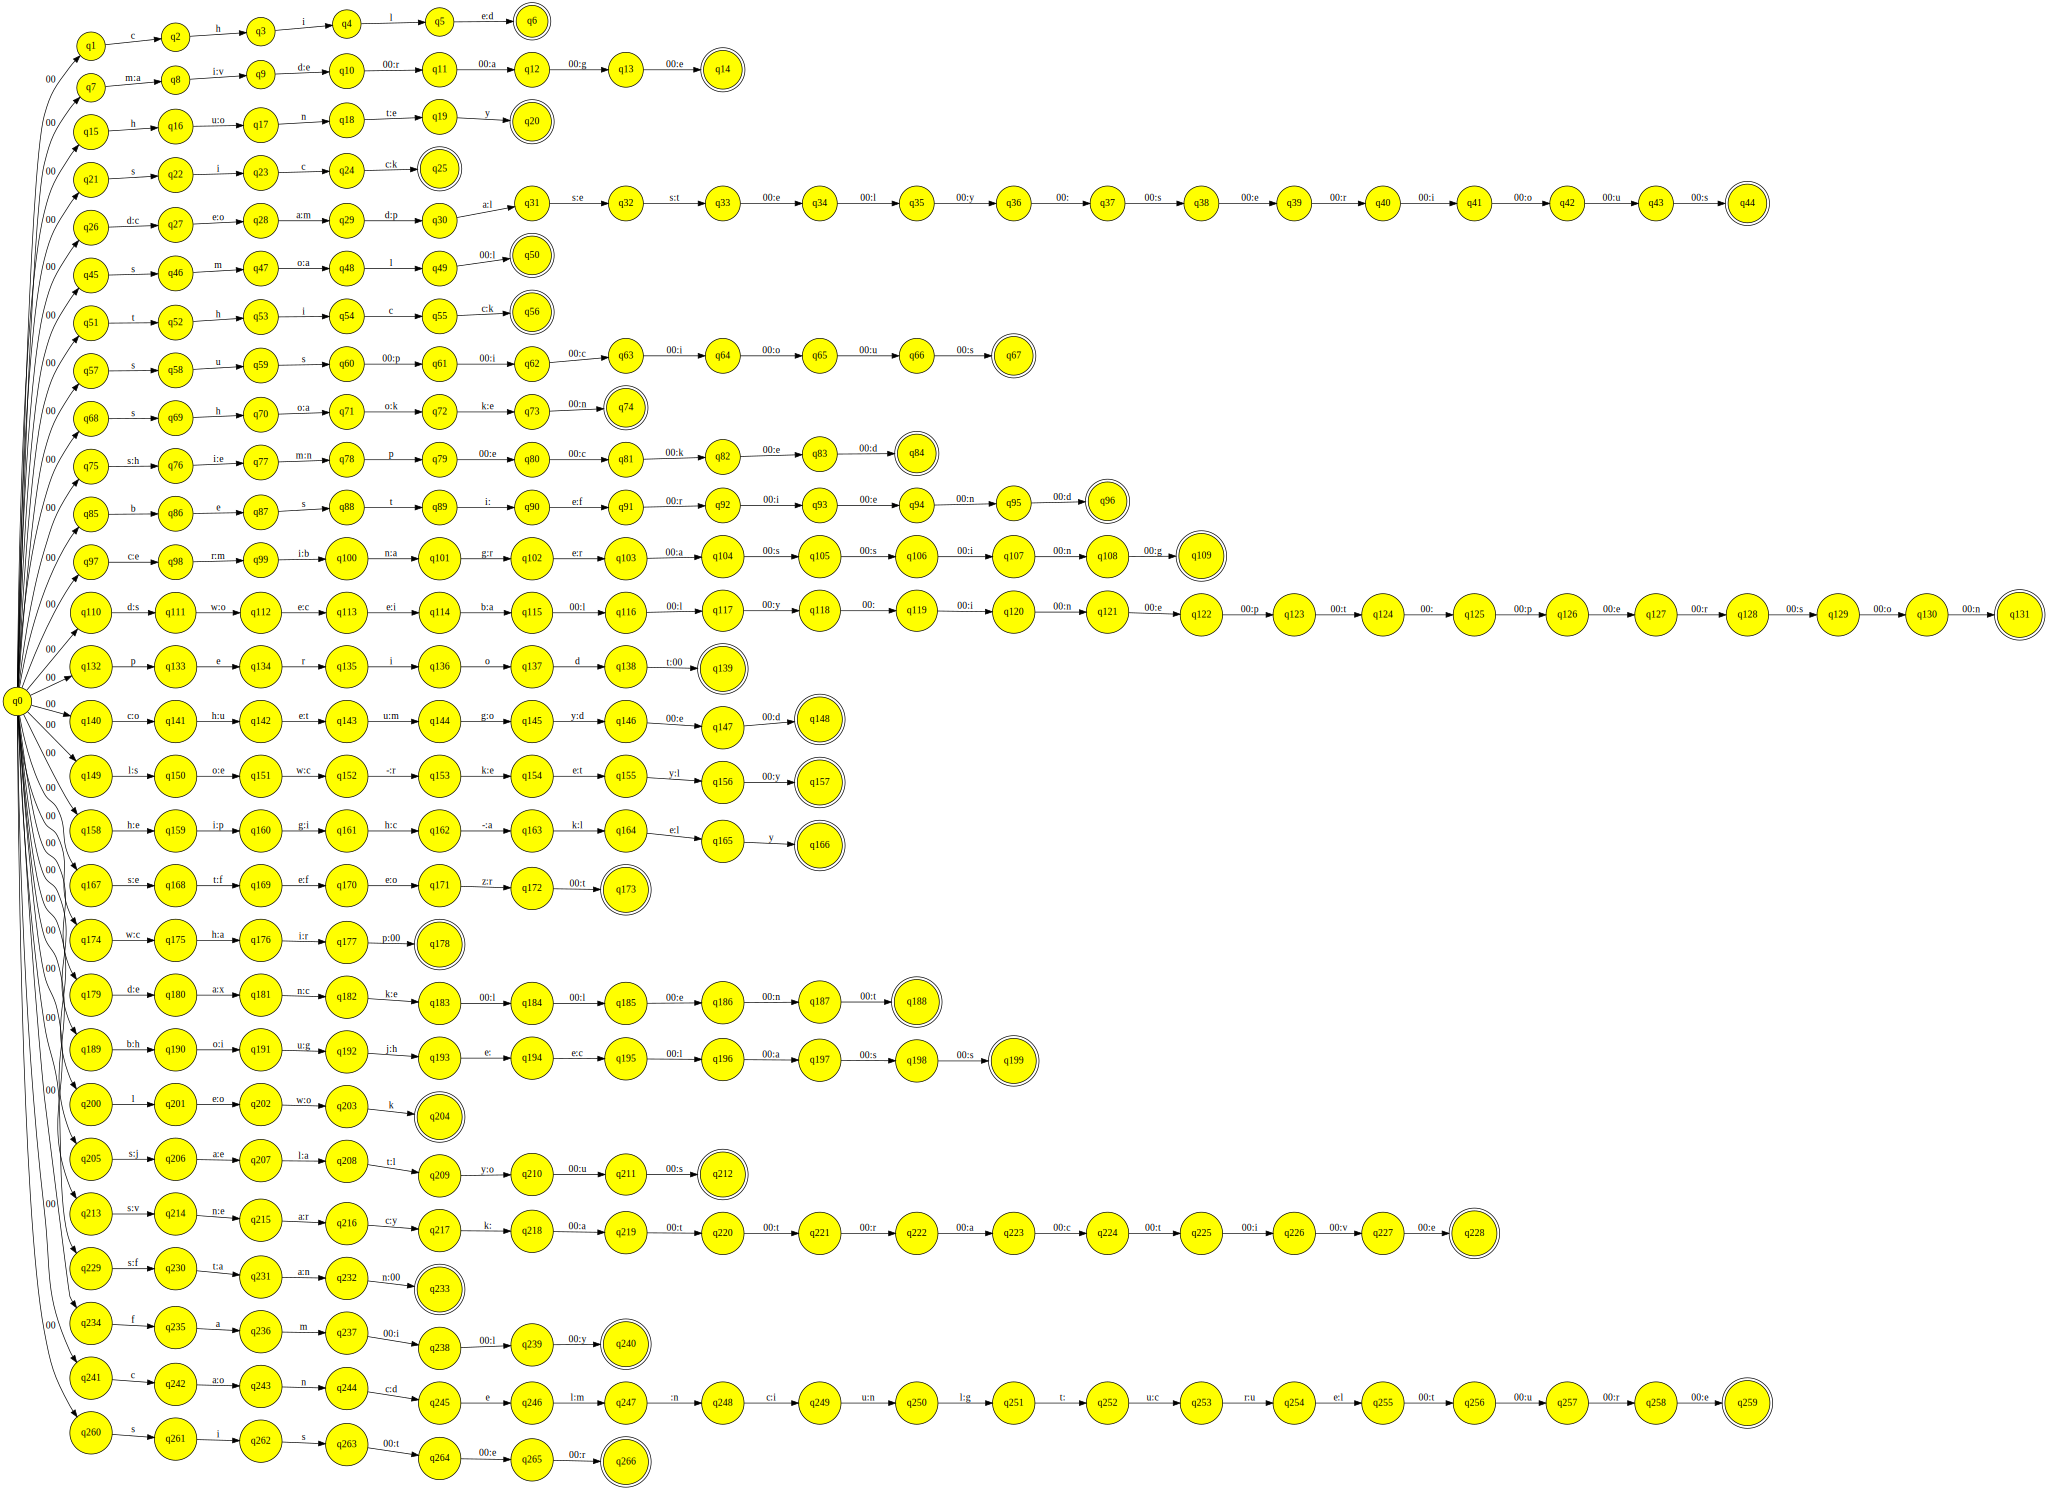

In [26]:
nominals_fst.view()

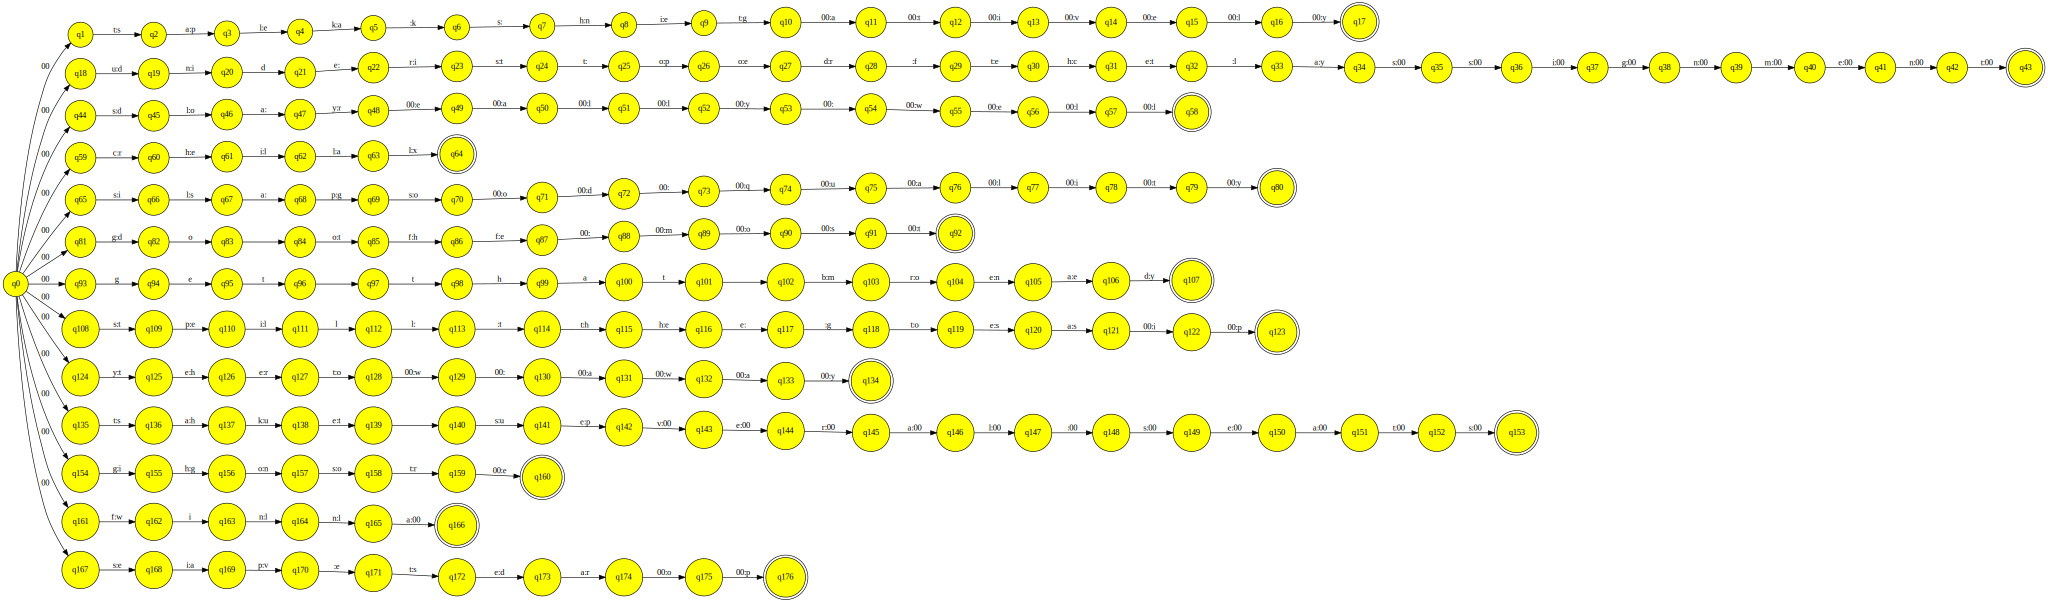

In [27]:
verbs_fst.view()

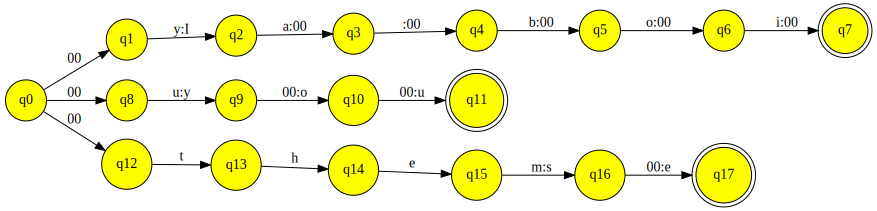

In [28]:
pronouns_fst.view()

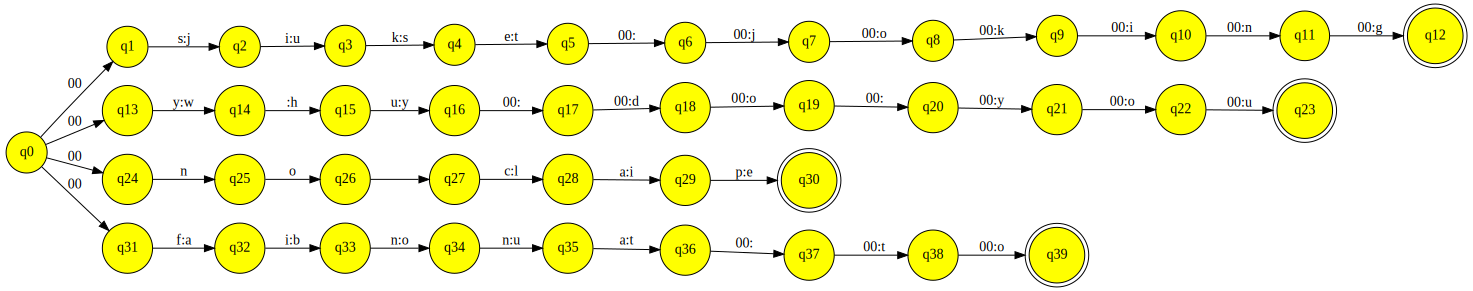

In [29]:
phrases_fst.view()

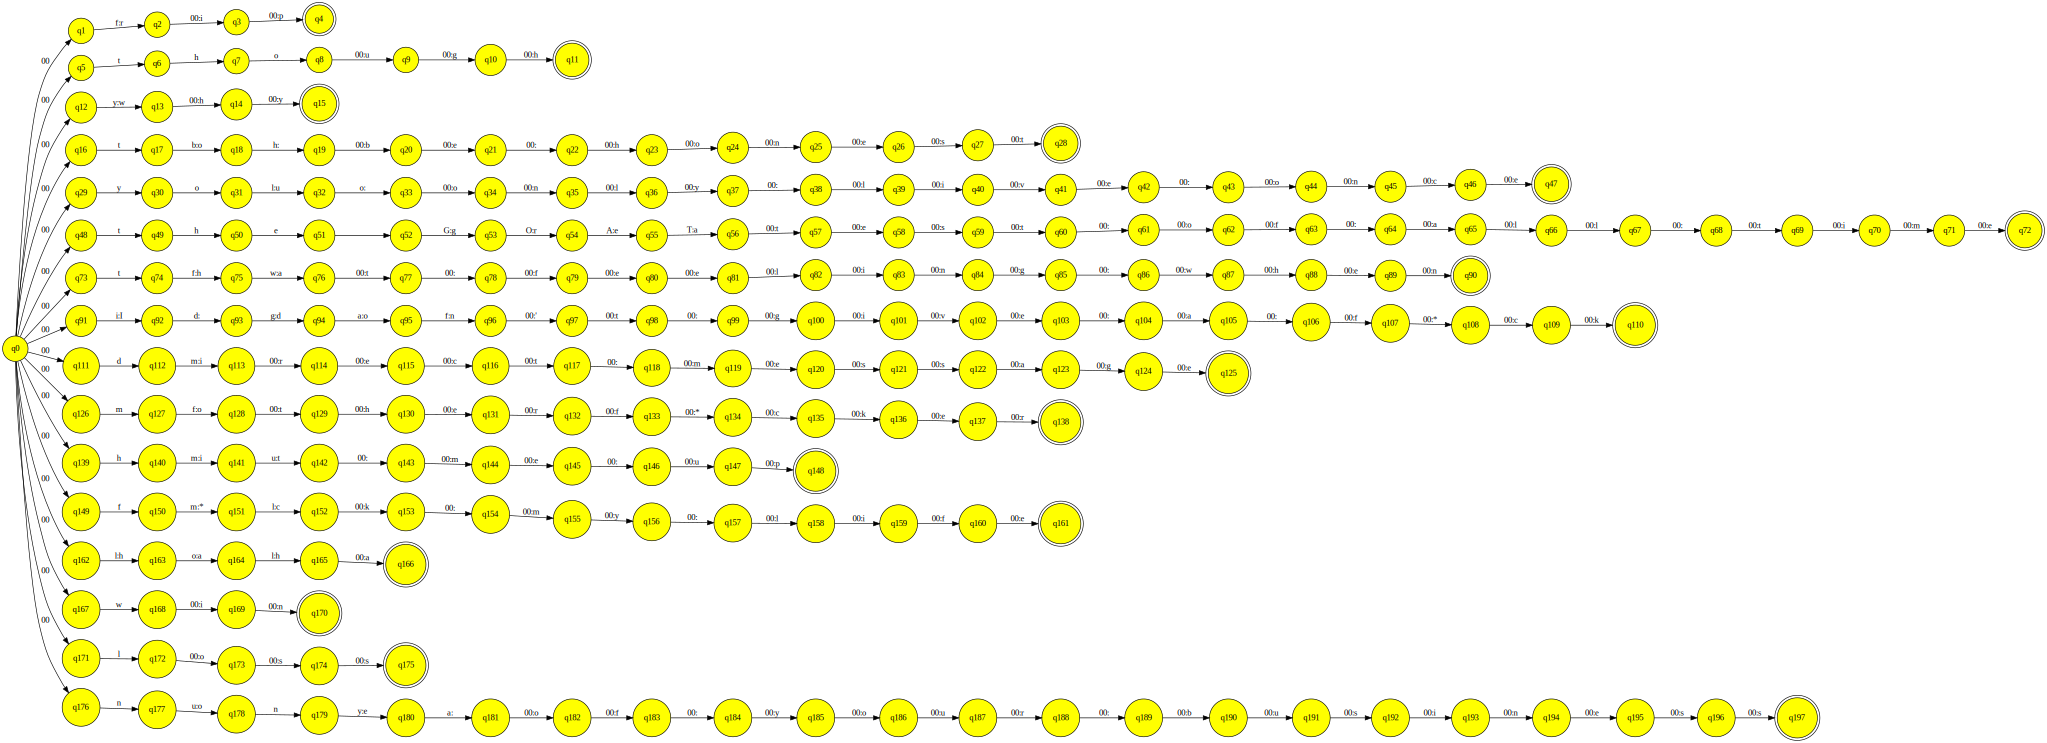

In [30]:
abbreviations_fst.view()

In [31]:
#Distance Measuring

import numpy as np

def LevenshteinDistance(string1, string2) -> int:
  """Finds word distance using Levenshtein Distance with Dynamic Programming"""
  m = len(string1)+1
  n = len(string2)+1
  matrix = np.zeros((m,n))
  for r in range(m):
    matrix[r,0] = r
  for c in range(n):
    matrix[0,c] = c
  for row in range(1,m):
    for col in range(1,n):
      deletion = matrix[row-1,col] + 1
      insertion = matrix[row,col-1] + 1
      if string1[row-1] == string2[col-1]:
        substitution = matrix[row-1,col-1]
      else:
        substitution = matrix[row-1,col-1]+1
      matrix[row,col] = min(deletion, insertion, substitution)
  return matrix[m-1,n-1]

def FindMostSimilar(string1, list1) -> str:
  """Returns the most similar word in the list given a string and a list."""
  distance = 1
  tempString = string1
  i = 0
  counter = 1
  for str1 in string1: 
    if string1[len(string1) - 2 -i] == string1[len(string1) - 1 - i]: #works on word final character repetitions, e.g.: cringessss 
      distance += 1
    elif counter >1:
      break
    else: 
      counter += 1
    i+=1
  for word in list1:
    if LevenshteinDistance(string1, word) <= distance:
      return word

In [32]:
def isItOnLexicon(string):
  """Checks if the string is in the lexicon"""
  for mainWord in lexicon:
    if string == lexicon[mainWord]:
      return True
  return False

In [33]:
def isItOnStopWords(string):
  """Checks if the string is in the stopwords list"""
  for mainWord in lexicon:
    if string == mainWord:
      return True
  return False

In [34]:
def lookup_function(*args):
  """Looks for argument(s) inside the lexicon"""
  output = ""
  isSame = False
  for arg in args: 
    if lexicon.get(arg):
      output += " " + lexicon[arg]
    else:
      if isItOnLexicon(arg):
        output += " " + arg
      elif lexicon.get(FindMostSimilar(arg, lexicon)) and isItOnStopWords(arg):
        output += " " + lexicon[FindMostSimilar(arg, lexicon)]
      else:
        output += " " + arg
  return output

In [35]:
def translator(*args) -> str:
  """Translates argument(s) with lookup_function"""
  result = ""
  for arg in args:
    words = arg.replace(".", " ")
    words = words.replace(",", " ")
    words = words.replace(":", " ")
    words = words.replace(";", " ")
    words = words.replace("!", " ")
    words = words.replace("(", " ")
    words = words.replace(")", " ")
    words = words.replace("&", " ")
    words = words.replace("\"", " ")
    words = words.replace("#", " ")
    words = words.replace("“", " ")
    words = words.replace("”", " ")
    words = words.replace("\'", " ")
    words = words.strip()
    words = words.split()

    i = 1
    for word in words:
      if i >= len(words):
        break
      if lexicon.get((words[i-1] + " " + words[i])):
        words[i-1] = words[i-1] + " " + words[i]
        words[i] = ""
        newArray = []
        j = 0
        for word in words:
          if words[j] != "":
            newArray.append(words[j])
          j+=1
        words = newArray
      i+=1
    i = 1
    for word in words:
      if i >= len(words)-1:
        break
      if lexicon.get((words[i-1] + " " + words[i] + " " + words[i+1])):
        words[i-1] = words[i-1] + " " + words[i] + " " + words[i+1]
        words[i] = ""
        words[i+1] = ""
        newArray = []
        j = 0
        for word in words:
          
          if words[j] != "":
            newArray.append(words[j])
          j+=1
        words = newArray
      i+=1
    i = 0
    for word in words:
      if words[i].lower() not in stopWords :
        words[i] = words[i].lower()
      i+=1
    for word in words:
      result += lookup_function(word)
  return (result.strip())


translator("a Yeet the bottle, yaas queen go off. I slay. go off and ya boi") # Testing if the code works properly


'a throw away the bottle yaas queen do the most I do really well do the most and I'

In [36]:
!pip install nest_asyncio
!pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-lvrxo5pu/twint_8e0d3767d826451a89761224f261274d
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-lvrxo5pu/twint_8e0d3767d826451a89761224f261274d
  Running command git checkout -q origin/master
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import nest_asyncio
nest_asyncio.apply()
import twint

In [38]:
import os
if os.path.exists("file.json"):
  os.remove("file.json")
config = twint.Config()
config.Search = "periodt"   # Change the string to the word you want to search for in Twitter
config.Lang = "en"
config.Limit =  20
config.Store_json = True
config.Output = "file.json"
twint.run.Search(config)

1532099481994502144 2022-06-01 20:39:16 +0000 <LongLiveC_j> Periodt
1532099316193628162 2022-06-01 20:38:36 +0000 <shaggyblaq> Johnny Depp did men proud periodt
1532099299135438850 2022-06-01 20:38:32 +0000 <SomewhereInFLA> @nosillanayr If you don’t like it than unfollow. Periodt!
1532099217757507585 2022-06-01 20:38:13 +0000 <BlackPressRadio> #JUNE IS BLACK MUSIC MONTH.  Celebrate that because a WHITE PRESIDENT (#JimmyCarter) made it so in June 1977 but a BIRACIAL one put #GayFolks against #AfricanAmericanMusicMonth PERIODT. ONLY CELEBRATING #BlackMusicMonth #RickyBattle #TajshonSherman #BlackTwitter
1532099182823104512 2022-06-01 20:38:04 +0000 <KingLuxe7> @sinfulmercmain And das on periodt and priorities.  https://t.co/gbMXiAyiJ1
1532099126791352321 2022-06-01 20:37:51 +0000 <deeeeeevo> there’s no reason i’ve been feeling like this for 3 days 😭
1532099110777626630 2022-06-01 20:37:47 +0000 <BlackPressRadio> @AtlanticRecords #JUNE IS BLACK MUSIC MONTH.  Celebrate that because a WHITE

In [39]:
#USING JSON AS ONE OF A FEW WAYS TO STORE THE TWEETS WE RETRACTED FROM TWINT.
import json
file = open("file.json", "r")
jsonLines = file.readlines()
file.close()

In [40]:
#STORING DATA 
data = {"data_obtained": []}
tweets = {"tweet": []}
i = 0
for jsonData in jsonLines:
  data["data_obtained"].append(json.loads(jsonData))
  tweets["tweet"].append(data["data_obtained"][i]["tweet"])
  i+=1
i = 0
output = ""
for j in range(len(tweets["tweet"])):
  output += translator(tweets["tweet"][i]) + "\n"
  i+=1

In [41]:
# GETTING TRANSLATED VERSIONS OF TWEETS
print(output)

period
johnny depp did men proud period
@nosillanayr If you don’t like it than unfollow period
june IS black music month celebrate that because a white president jimmycarter made it so in june 1977 but a biracial one put gayfolks against africanamericanmusicmonth period ONLY celebrating blackmusicmonth rickybattle tajshonsherman blacktwitter
@sinfulmercmain And das on period and priorities https //t co/gbmxiayij1
there’s no reason i’ve been feeling like this for 3 days 😭
@atlanticrecords june IS black music month celebrate that because a white president jimmycarter made it so in june 1977 but a biracial one put gayfolks against africanamericanmusicmonth period ONLY celebrating blackmusicmonth rickybattle tajshonsherman blacktwitter
@naima june IS black music month celebrate that because a white president jimmycarter made it so in june 1977 but a biracial one put gayfolks against africanamericanmusicmonth period ONLY celebrating blackmusicmonth rickybattle tajshonsherman blacktwitter
@a

In [42]:
#NO TWINT DATA INCLUDED IN THIS, THIS FUNCTION ONLY TRANSLATES THE GIVEN STRING.

translator("I y u ghost me tho")

'I why do you ignore me though'